# Importing Necessary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/mrudula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mrudula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/Users/mrudula/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Display the first few rows of the dataset
print(data.head(5))

  Customer_ID     Month  Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0  CUS_0x1000   January   17     Lawyer       30625.94            2706.161667   
1  CUS_0x1000  February   17     Lawyer       30625.94            2706.161667   
2  CUS_0x1000     March   17     Lawyer       30625.94            2706.161667   
3  CUS_0x1000     April   17     Lawyer       30625.94            2706.161667   
4  CUS_0x1000       May   17     Lawyer       30625.94            2706.161667   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                6.0              5.0             27          2.0  ...   
1                6.0              5.0             27          2.0  ...   
2                6.0              5.0             27          2.0  ...   
3                6.0              5.0             27          2.0  ...   
4                6.0              5.0             27          2.0  ...   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_His

In [3]:
# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
categorical_features = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 
                        'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature].astype(str))

# List of numerical features for scaling
numerical_features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'
]

# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# KNN Model

In [4]:
# Convert features (X) and target (y) explicitly to NumPy arrays
X = data.drop(columns=['Customer_ID', 'Credit_Score']).to_numpy().copy()
y = data['Credit_Score'].to_numpy().copy()

print("Data conversion successful:", type(X), X.flags.c_contiguous)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Data conversion successful: <class 'numpy.ndarray'> True
Training data shape: (80000, 23), Testing data shape: (20000, 23)


In [5]:
# Initialize and train the KNN model (k=5, using Euclidean distance)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7173

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.60      0.60      3531
           1       0.73      0.72      0.72      5838
           2       0.76      0.75      0.75     10631

    accuracy                           0.72     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.72      0.72      0.72     20000



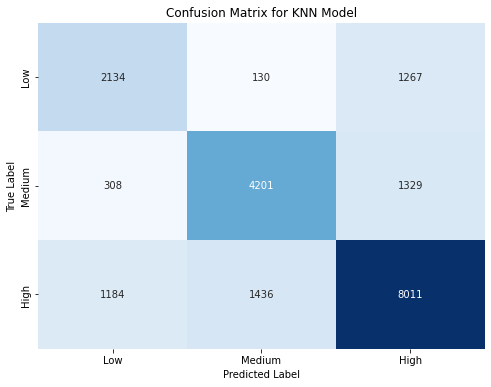

In [6]:
# Confusion Matrix
# Generate predictions using the trained KNN model
y_pred = knn_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

# Decision Tree Model

In [7]:
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
model = DecisionTreeClassifier(random_state = 42)

model.fit(X_train_dt, Y_train_dt)
y_pred_dt = model.predict(X_test_dt)

In [9]:
from sklearn import metrics

print(metrics.accuracy_score(Y_test_dt, y_pred_dt))

0.711


In [10]:
print("Decision Tree Classifier Report:")
print(classification_report(Y_test_dt, y_pred_dt))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      5300
           1       0.70      0.69      0.69      8812
           2       0.74      0.75      0.74     15888

    accuracy                           0.71     30000
   macro avg       0.70      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



# Random Forest Model

In [11]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_dt, Y_train_dt)
rf_y_pred = rf_classifier.predict(X_test_dt)

In [12]:
print("\nRandom Forest Classifier Report:")
print(classification_report(Y_test_dt, rf_y_pred))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      5300
           1       0.80      0.83      0.81      8812
           2       0.83      0.82      0.82     15888

    accuracy                           0.81     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.81      0.81      0.81     30000

